# Loan Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

# Missing data

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df[df["Gender"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [6]:
df_temp = df.dropna()
df_temp.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df_temp.shape

(480, 13)

In [8]:
df_temp = df_temp.astype({"LoanAmount": "int"})

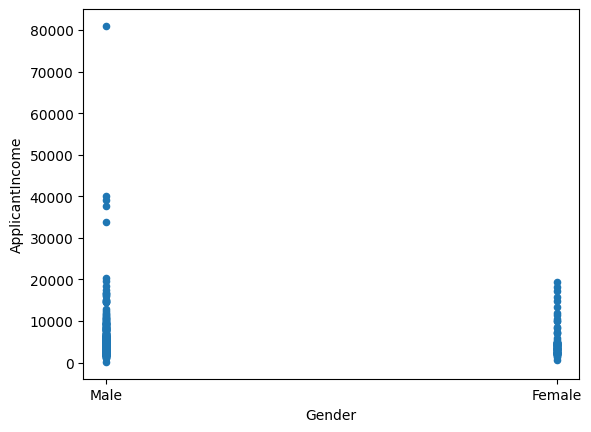

In [9]:
df_temp.plot.scatter("Gender", "ApplicantIncome")
plt.show()

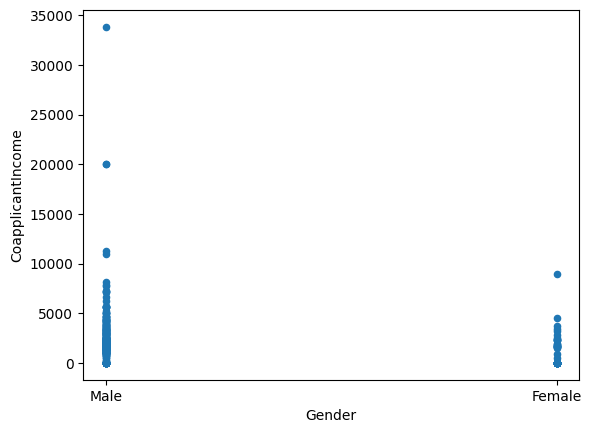

In [10]:
df_temp.plot.scatter("Gender", "CoapplicantIncome")
plt.show()

In [11]:
df.loc[df["Gender"].isna()
        & (
            (df["ApplicantIncome"] > 20_000)
            | (df["CoapplicantIncome"] > 5_000)
        ), "Gender"] = 'Male'

In [12]:
df[df["Gender"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y


In [13]:
df.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson").style.background_gradient(cmap="RdYlGn", vmin=-1, vmax=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.002110,-0.009854,0.047757,0.039442,0.036461,0.826514,0.427639,0.404596,0.061704,0.015365,0.069025,-0.011773
Gender,-0.002110,1.000000,-0.343084,-0.160902,-0.031081,-0.040071,-0.024782,-0.172929,0.018922,-0.021321,-0.020698,0.060220,0.000885
Married,-0.009854,-0.343084,1.000000,0.345269,0.022530,0.030171,-0.001825,0.238810,0.019812,-0.002572,-0.028879,-0.003737,-0.075547
Dependents,0.047757,-0.160902,0.345269,1.000000,0.051414,0.048221,0.072894,-0.002040,0.054899,0.065055,0.029692,0.005011,-0.014263
Education,0.039442,-0.031081,0.022530,0.051414,1.000000,0.000820,0.073543,0.084689,-0.072995,0.047595,0.037534,-0.003592,0.085884
Self_Employed,0.036461,-0.040071,0.030171,0.048221,0.000820,1.000000,0.012799,-0.060386,0.004457,0.023490,0.055704,0.034247,0.011332
ApplicantIncome,0.826514,-0.024782,-0.001825,0.072894,0.073543,0.012799,1.000000,0.378095,0.365594,0.006143,0.010961,0.078590,-0.018675
CoapplicantIncome,0.427639,-0.172929,0.238810,-0.002040,0.084689,-0.060386,0.378095,1.000000,0.203701,0.070696,-0.066805,0.018346,-0.084419
LoanAmount,0.404596,0.018922,0.019812,0.054899,-0.072995,0.004457,0.365594,0.203701,1.000000,0.048303,0.007100,0.114591,0.040160
Loan_Amount_Term,0.061704,-0.021321,-0.002572,0.065055,0.047595,0.023490,0.006143,0.070696,0.048303,1.000000,-0.004415,-0.040700,0.073701


In [14]:
df.isna().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df["Gender"] = df["Gender"].ffill()
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df[df["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [17]:
df = df[df.isna().sum(axis=1) < 2]
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df[df["Dependents"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
571,LP002847,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [19]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [20]:
df.groupby(["Dependents", "Married"]).count()

Loan_ID  Gender  Education  Self_Employed  \
Dependents Married                                              
0          No           170     170        170            162   
           Yes          171     171        171            164   
1          No            23      23         23             20   
           Yes           77      77         77             76   
2          No             8       8          8              7   
           Yes           93      93         93             89   
3+         No             6       6          6              6   
           Yes           44      44         44             43   

                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
Dependents Married                                                   
0          No                   170                170         166   
           Yes                  171                171         165   
1          No                    23                 23          22   
           Yes                   77                 77          74   
2          No                     8                  8           8   
           Yes                   93                 93          90   
3+         No                     6                  6           5   
           Yes                   44                 44          43   

                    Loan_Amount_Term  Credit_History  Property_Area  \
Dependents Married                                                    
0          No                    165             162            170   
           Yes                   166             153            171   
1          No                     23              19             23   
           Yes                    76              71             77   
2          No                      8               8              8   
           Yes                    93              87             93   
3+         No                      6               6              6   
           Yes                    43              42             44   

                    Loan_Status  
Dependents Married               
0          No               170  
           Yes              171  
1          No                23  
           Yes               77  
2          No                 8  
           Yes               93  
3+         No                 6  
           Yes               44

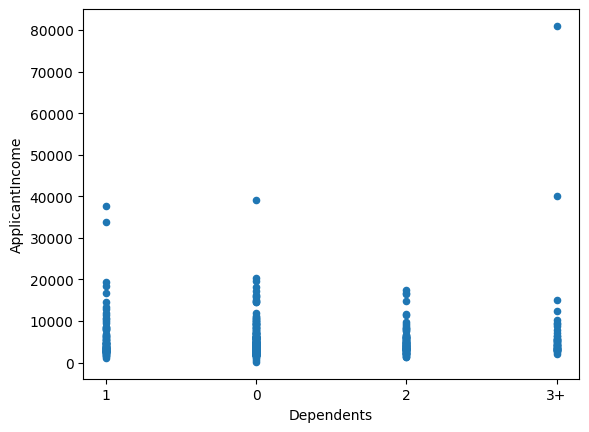

In [21]:
df_temp.plot.scatter("Dependents", "ApplicantIncome")
plt.show()

In [22]:
df.loc[df["Dependents"].isna() & (df["Married"] == 'Yes'), "Dependents"] = 1
df.loc[df["Dependents"].isna() & (df["Married"] == 'No'), "Dependents"] = 0
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df[df["Self_Employed"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
170,LP001581,Male,Yes,0,Not Graduate,NaN,1820,1769.0,95.0,360.0,1.0,Rural,Y
218,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
231,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y
268,LP001883,Female,No,0,Graduate,NaN,3418,0.0,135.0,360.0,1.0,Rural,N


In [24]:
df["Self_Employed"] = df["Self_Employed"].ffill()
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df[df["LoanAmount"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N
305,LP001990,Male,No,0,Not Graduate,No,2000,0.0,NaN,360.0,1.0,Urban,N


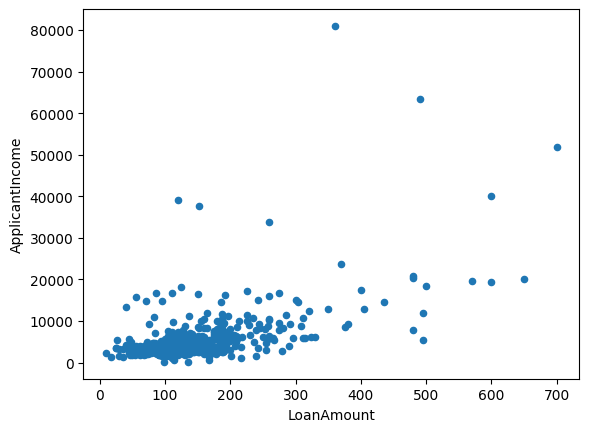

In [26]:
df.plot.scatter("LoanAmount", "ApplicantIncome")
plt.show()

In [27]:
import statsmodels.api as sm

In [28]:
x = df_temp['ApplicantIncome']
y = df_temp['LoanAmount']
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
model = sm.OLS(y, x).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     155.4
Date:                Fri, 31 May 2024   Prob (F-statistic):           4.45e-31
Time:                        10:52:54   Log-Likelihood:                -2719.4
No. Observations:                 480   AIC:                             5443.
Df Residuals:                     478   BIC:                             5451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             106.9977      4.402     

In [29]:
temp_test = df[df["LoanAmount"].isna()]["ApplicantIncome"]
temp_test = sm.add_constant(temp_test)
predictions = model.predict(temp_test)
print(len(predictions))
predictions


19


0      148.145792
35     123.002502
63     141.786101
81     123.846708
103    139.724830
113    159.415952
127    134.188241
202    135.081693
284    252.391253
305    121.067861
322    132.330986
338    119.871902
387    128.173268
437    122.566328
479    127.730059
524    139.921811
550    153.661276
551    124.529109
605    123.881884
dtype: float64

In [30]:
import numpy as np
predictions = np.round(np.array(predictions))
predictions

array([148., 123., 142., 124., 140., 159., 134., 135., 252., 121., 132.,
       120., 128., 123., 128., 140., 154., 125., 124.])

In [31]:
df.loc[df["LoanAmount"].isna(), "LoanAmount"] = predictions
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df[df["Loan_Amount_Term"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y
367,LP002188,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N


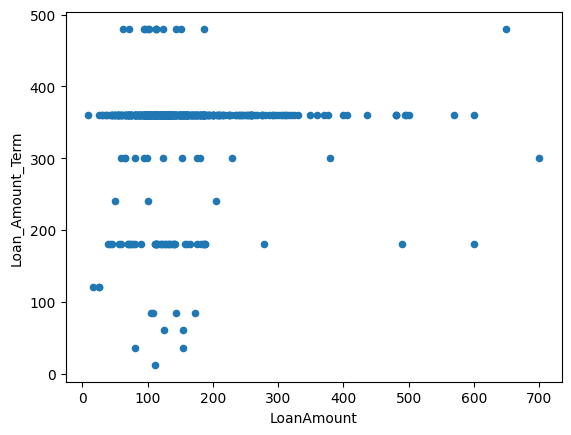

In [33]:
df.plot.scatter("LoanAmount", "Loan_Amount_Term")
plt.show()

In [34]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].ffill()
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
df.groupby(["Credit_History", "Loan_Status"]).count()

Loan_ID  Gender  Married  Dependents  Education  \
Credit_History Loan_Status                                                    
0.0            N                 82      82       82          82         82   
               Y                  7       7        7           7          7   
1.0            N                 97      97       97          97         97   
               Y                372     372      372         372        372   

                            Self_Employed  ApplicantIncome  CoapplicantIncome  \
Credit_History Loan_Status                                                      
0.0            N                       82               82                 82   
               Y                        7                7                  7   
1.0            N                       97               97                 97   
               Y                      372              372                372   

                            LoanAmount  Loan_Amount_Term  Property_Area  
Credit_History Loan_Status                                               
0.0            N                    82                82             82  
               Y                     7                 7              7  
1.0            N                    97                97             97  
               Y                   372               372            372

In [36]:
df[df["Credit_History"].isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y


In [37]:
df.dropna(subset=["Credit_History"], inplace=True)


In [38]:
df = df[condacmd]
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outliers

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,148.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


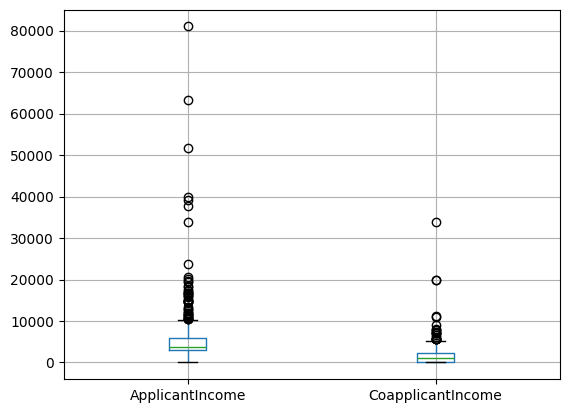

In [40]:
df.boxplot(column=["ApplicantIncome", "CoapplicantIncome"])
plt.show()

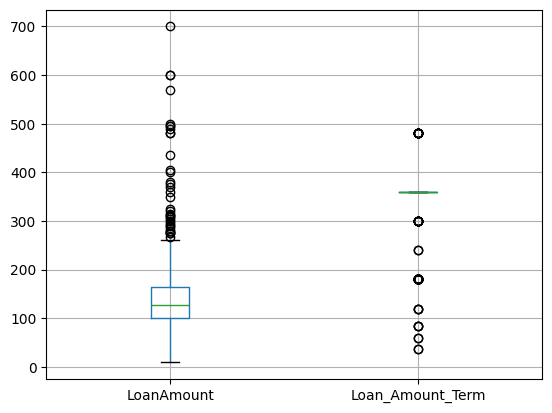

In [41]:
df.boxplot(column=["LoanAmount", "Loan_Amount_Term"])
plt.show()

In [42]:
df.to_csv("loan-clean.csv")